In [21]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib

In [22]:
import keras

In [23]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [24]:
cleveland = pd.read_csv(r"C:\Users\ayush\Downloads\heart_statlog_cleveland_hungary_final (1).csv")

In [25]:
print( 'Shape of DataFrame: {}'.format(cleveland.shape))
print (cleveland.loc[1])

Shape of DataFrame: (1190, 12)
age                     49.0
sex                      0.0
chest pain type          3.0
resting bp s           160.0
cholesterol            180.0
fasting blood sugar      0.0
resting ecg              0.0
max heart rate         156.0
exercise angina          0.0
oldpeak                  1.0
ST slope                 2.0
target                   1.0
Name: 1, dtype: float64


In [26]:
cleveland.loc[280:]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
280,54,0,2,130,253,0,1,155,0,0.0,1,0
281,60,1,3,120,246,0,2,135,0,0.0,1,0
282,49,1,4,150,222,0,0,122,0,2.0,2,1
283,51,0,3,130,220,0,0,160,1,2.0,1,0
284,55,0,2,110,344,0,1,160,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [27]:
data = cleveland[~cleveland.isin(['?'])]
data.loc[280:]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
280,54,0,2,130,253,0,1,155,0,0.0,1,0
281,60,1,3,120,246,0,2,135,0,0.0,1,0
282,49,1,4,150,222,0,0,122,0,2.0,2,1
283,51,0,3,130,220,0,0,160,1,2.0,1,0
284,55,0,2,110,344,0,1,160,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [28]:
data = data.dropna(axis=0)
data.loc[280:]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
280,54,0,2,130,253,0,1,155,0,0.0,1,0
281,60,1,3,120,246,0,2,135,0,0.0,1,0
282,49,1,4,150,222,0,0,122,0,2.0,2,1
283,51,0,3,130,220,0,0,160,1,2.0,1,0
284,55,0,2,110,344,0,1,160,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [29]:
print(data.shape)
print(data.dtypes)

(1190, 12)
age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object


In [30]:
data = data.apply(pd.to_numeric)
data.dtypes

age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

In [31]:
data.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


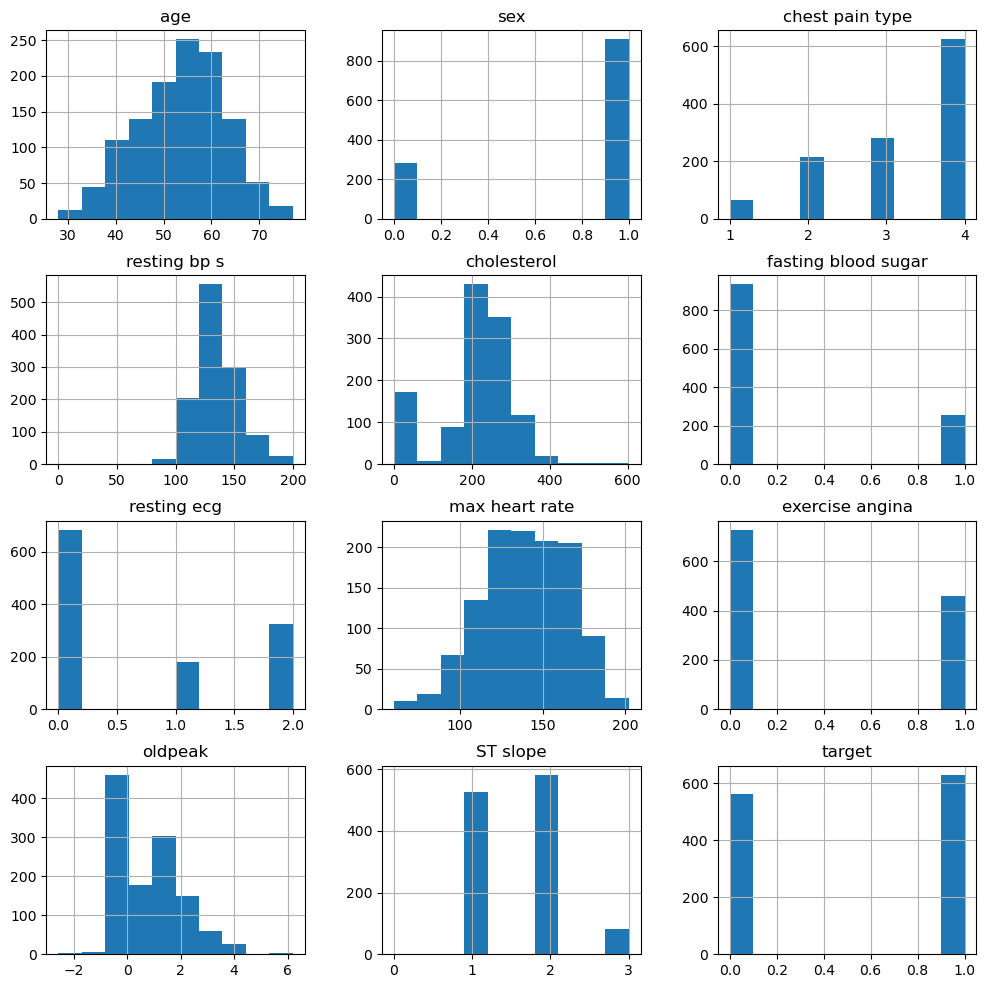

In [32]:
data.hist(figsize = (12, 12))
plt.show()

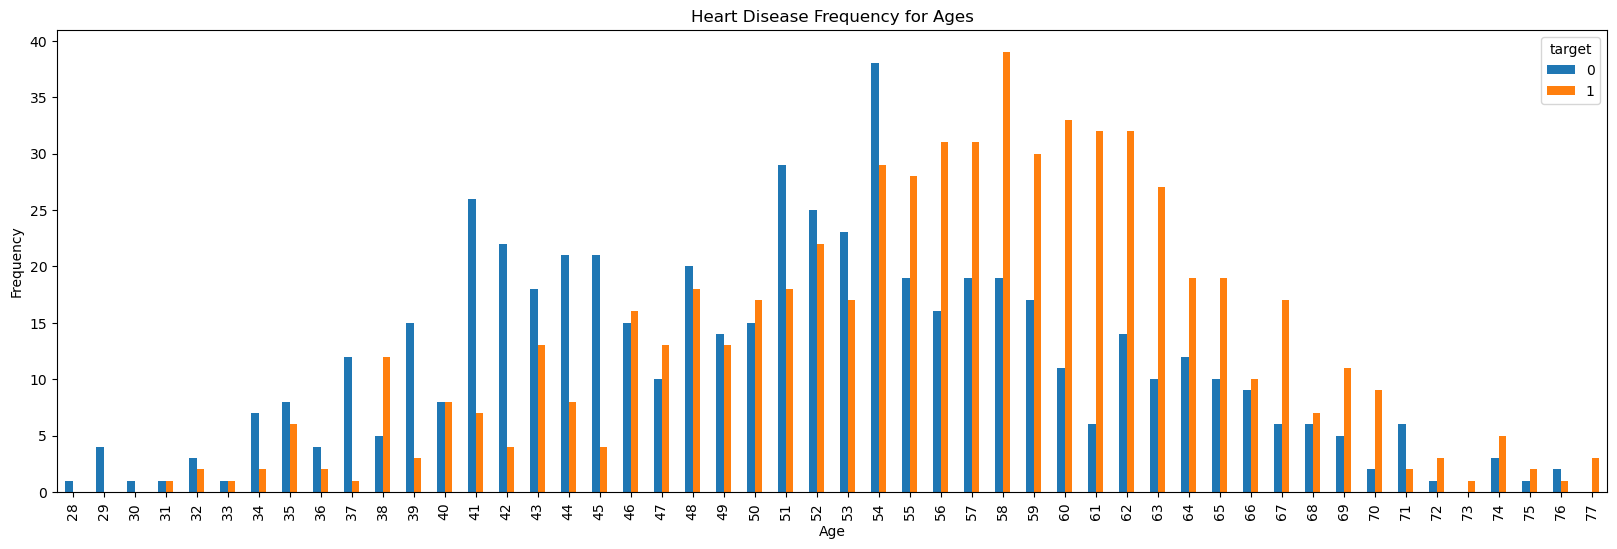

In [33]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

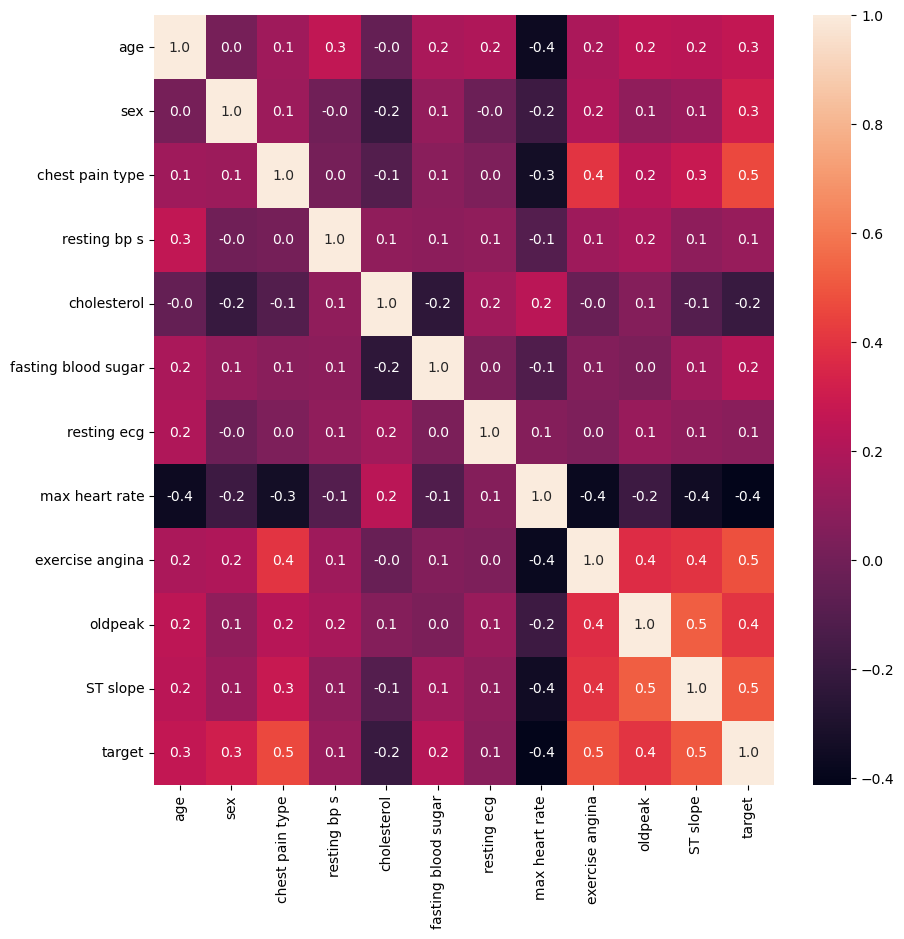

In [34]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

In [35]:
X = np.array(data.drop(['target'], 1))
y = np.array(data['target'])

C:\Users\ayush\AppData\Local\Temp\ipykernel_4004\1844786348.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(data.drop(['target'], 1))


In [36]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

In [37]:
from sklearn import model_selection

In [38]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=42, test_size = 0.2)

In [41]:
import tensorflow

In [42]:
from tensorflow.keras.utils import to_categorical

In [43]:
Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(952, 2)
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [44]:
X

array([[-1.46672783,  0.55599543, -1.31835093, ..., -0.79521891,
        -0.84979236, -1.02321701],
       [-0.50460037, -1.79857595, -0.24893198, ..., -0.79521891,
         0.07111913,  0.61558278],
       [-1.78743698,  0.55599543, -1.31835093, ..., -0.79521891,
        -0.84979236, -1.02321701],
       ...,
       [ 0.35062404,  0.55599543,  0.82048698, ...,  1.25751537,
         0.25530143,  0.61558278],
       [ 0.35062404, -1.79857595, -1.31835093, ..., -0.79521891,
        -0.84979236,  0.61558278],
       [-1.68053393,  0.55599543, -0.24893198, ..., -0.79521891,
        -0.84979236, -1.02321701]])

In [45]:
from sklearn import svm

In [46]:
clv = svm.SVC(kernel='linear')

In [47]:
clv.fit(X_train, y_train)

SVC(kernel='linear')

In [48]:
y_pred = clv.predict(X_test)

In [49]:
from sklearn import metrics

In [50]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8361344537815126
